In [2]:
working_directory_path="D:/Prashant/LEARNING/UPX/Projects/"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [4]:
flightData = pd.read_csv(working_directory_path+"Project_Datasets/Project_1_NYC-Flight_data/flight_data.csv")

In [5]:
flightData.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


# Total Flights Delayed

In [37]:
totalFlights = flightData.dropna()
delayedFlights = flightData[flightData['dep_delay']>0].dropna()
cancelledFlights = flightData[flightData['dep_time'].isnull()]

In [39]:
print("Total number of Flights Delayed while departing is = "+str(len(delayedFlights)))
print("Total number of Flights Cancelled = "+str(len(cancelledFlights)))

Total number of Flights Delayed while departing is = 127745
Total number of Flights Cancelled = 8255


In [40]:
flightsByCarrier = flightData.groupby('carrier')['carrier'].count()
flightsDelayedByCarrier = delayedFlights.groupby('carrier')['carrier'].count()
flightsCancelledByCarrier = cancelledFlights.groupby('carrier')['carrier'].count()

pctDelayedPerCarrier = (flightsDelayedByCarrier/flightsByCarrier)*100
pctCancelledPerCarrier = (flightsCancelledByCarrier/flightsByCarrier)*100

flightsDeptByAirport = flightData.groupby('origin')['origin'].count()
flightsDeptDelayedByAirport = delayedFlights.groupby('origin')['origin'].count()
pctDeptDelayedPerAirport = (flightsDeptDelayedByAirport/flightsDeptByAirport)*100

pctFlightsPerCarrier = (flightsByCarrier/len(totalFlights))*100

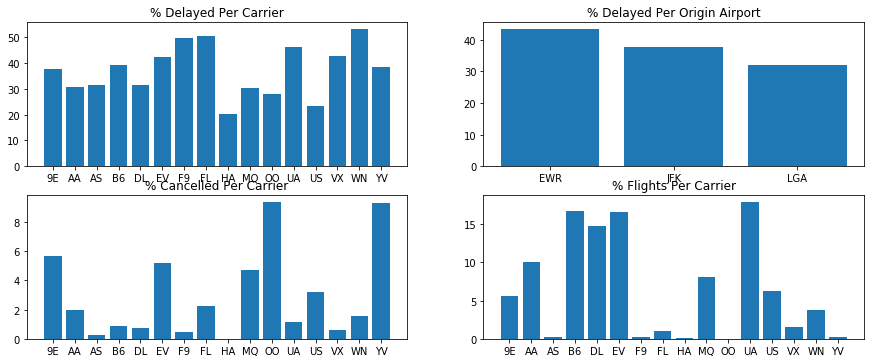

In [41]:
plt.figure(0,figsize=(15,9))

plt.subplot(321)
plt.bar(x=pctDelayedPerCarrier.keys(),height=pctDelayedPerCarrier)
plt.title('% Delayed Per Carrier')

plt.subplot(322)
plt.bar(x=pctDeptDelayedPerAirport.keys(),height=pctDeptDelayedPerAirport)
plt.title('% Delayed Per Origin Airport')

plt.subplot(323)
plt.bar(x=pctCancelledPerCarrier.keys(),height=pctCancelledPerCarrier)
plt.title('% Cancelled Per Carrier')

plt.subplot(324)
plt.bar(x=pctFlightsPerCarrier.keys(),height=pctFlightsPerCarrier)
plt.title('% Flights Per Carrier')

plt.show()

As per the above charts..

LGA is best airport in terms of departure
HA carrier is providing least delayed Service but considering no of flights per Carrier while YV is offering worst service.


In [21]:
flightsPerMonth = flightData.groupby('month')['month'].count()
delayedPerMonth = delayedFlights.groupby('month')['month'].count()
pctDelayedPerMonth = (delayedPerMonth/flightsPerMonth)*100


In [ ]:
plt.bar(x=['jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],height=pctDelayedPerMonth)
plt.title('% Delayed Per month')

plt.show()

Flight Delays are mostly observed in summer-time and X'mas as number of travellers are at pick during this time.

# Aircraft Speed Analysis

In [54]:
totalFlights.loc['speed'] = totalFlights.distance/(totalFlights.air_time/60)
carrierBySpeed = totalFlights.groupby('carrier')['speed'].mean()

C:\upx\python\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[]

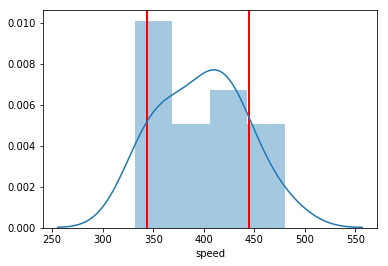

In [60]:
x10_pct = np.percentile(carrierBySpeed, 10.0)
x90_pct = np.percentile(carrierBySpeed, 90.0)
plt.axvline(x=x10_pct, linewidth=2, color = 'r')
plt.axvline(x=x90_pct, linewidth=2, color = 'r')
sns.distplot(carrierBySpeed)
plt.plot()

As per above distribution 80% flights of airlines are having speed between 340 to 440 miles per hour

Top Five airlines by speed

In [69]:
carrierBySpeed.nlargest(5)

carrier
HA    480.357719
VX    446.174935
AS    443.678889
F9    425.172111
UA    420.883774
Name: speed, dtype: float64

Top 5 flights by speed

In [70]:
flightBySpeed = totalFlights.groupby('tailnum')['speed'].mean()

In [72]:
flightBySpeed.nlargest(5)

tailnum
N228UA    500.816327
N315AS    498.685121
N654UA    498.582090
N819AW    490.344828
N382HA    485.602647
Name: speed, dtype: float64

slowest 5 flights by speed

In [73]:
flightBySpeed.nsmallest(5)

tailnum
N505SW    258.139535
N959UW    270.081471
N955UW    271.167578
N504MJ    271.482235
N950UW    272.523169
Name: speed, dtype: float64

# On Time Arrival % Analysis

In [87]:
onTimeFlights = totalFlights[totalFlights['arr_delay'] <= 0]

onTimeByCarrier = onTimeFlights.groupby('carrier')['carrier'].count()
pctOnTimePerCarrier = (onTimeByCarrier/flightsByCarrier)*100

onTimeByDest = onTimeFlights.groupby('dest')['dest'].count()
flightsByDest = flightData.groupby('dest')['dest'].count()
pctOnTimePerDest = (onTimeByDest/flightsByDest)*100

In [ ]:
Top 5 Airports based on Arrival time

In [100]:
pctOnTimePerDest.nlargest(5)

dest
LEX    100.000000
SNA     69.454545
MVY     68.778281
SEA     66.683660
STT     66.666667
Name: dest, dtype: float64

# Max Number Of Flights Headed To Some Particular Airport

In [105]:
flightsByDest.nlargest(5)

dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
Name: dest, dtype: int64